# `datamate` Examples

Basic examples demonstrating `datamate` functionality.

<div style="position: relative; display: inline-block;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Brainbow_%28Smith_2007%29.jpg/715px-Brainbow_%28Smith_2007%29.jpg" alt="Brainbow (Smith 2007)" style="max-width: 100%; height: auto;">
    <div style="font-size: 12px; color: #555; margin-top: 5px;">
        Image: "Mouse neurons labeled with fluorescent tags" by Stephen J Smith (2007), licensed under 
        <a href="https://creativecommons.org/licenses/by/3.0/" target="_blank" style="color: #007BFF;">CC BY 3.0</a>.
    </div>
</div>

## Filesystem as memory

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from datamate import Directory, set_root_dir

%load_ext autoreload
%autoreload 2

In [2]:
# we set the root directory
root_dir = Path(".") / "data"
set_root_dir(root_dir)

In [3]:
# we erase data from earlier execution of this notebook -- ignore this cell
if root_dir.exists():
    import shutil

    shutil.rmtree(root_dir)

In [4]:
# we create a Directory instance
cell_measurements = Directory()
cell_measurements

Directory_0000/
    (empty)

We 'measure' cell attributes: identity, x- and y-coordinates, and colors.

In [5]:
# we store data by setting attributes
n_cells = 100
cell_measurements.cell_id = np.arange(n_cells)
cell_measurements.x = np.random.normal(0, 1, size=n_cells)
cell_measurements.y = np.random.normal(0, 1, size=n_cells)
cell_measurements.colors = np.random.rand(n_cells, 3)

In [6]:
# we verify files with the tree-view method
# (automatically called)
cell_measurements

Directory_0000/ - Last modified: January 27, 2025 14:52:42
├── _meta.yaml
├── cell_id.h5
├── colors.h5
├── x.h5
└── y.h5

displaying: 1 directory, 5 files, 2 levels.

Text(0.5, 1.0, 'Locations and colors of 100 cells')

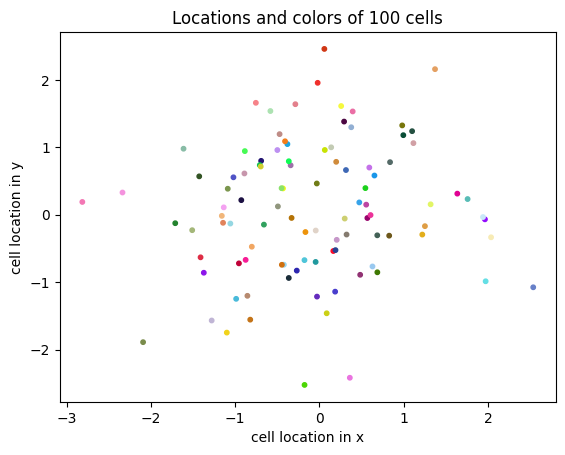

In [7]:
# we access data as attributes
plt.scatter(cell_measurements.x, cell_measurements.y, c=cell_measurements.colors, s=10)
plt.xlabel("cell location in x")
plt.ylabel("cell location in y")
plt.title(f"Locations and colors of {n_cells} cells")

Text(0.5, 1.0, 'Locations and colors of 50 cells')

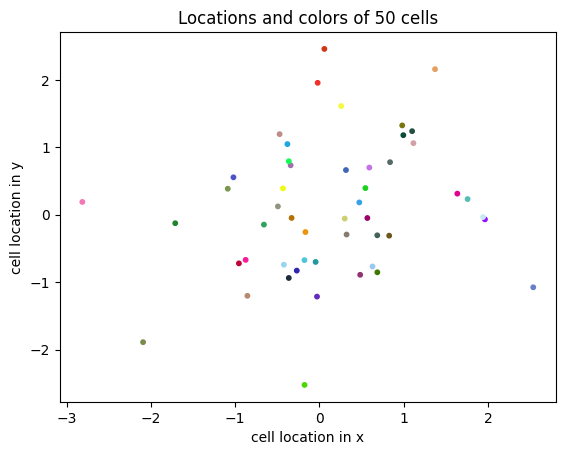

In [8]:
# we index h5-arrays from disk without fully loading them to reduce memory load
start_cell_id = 0
end_cell_id = 50
plt.scatter(
    cell_measurements.x[start_cell_id:end_cell_id],
    cell_measurements.y[start_cell_id:end_cell_id],
    c=cell_measurements.colors[start_cell_id:end_cell_id],
    s=10,
)
plt.xlabel("cell location in x")
plt.ylabel("cell location in y")
plt.title(f"Locations and colors of {end_cell_id - start_cell_id} cells")

In [9]:
# we use the directory name to point to the same directory again
cell_measurements = Directory("Directory_0000")

# works also with specifying the root directory
# cell_measurements = Directory(root_dir / "Directory_0000")

cell_measurements

Directory_0000/ - Last modified: January 27, 2025 14:52:42
├── _meta.yaml
├── cell_id.h5
├── colors.h5
├── x.h5
└── y.h5

displaying: 1 directory, 5 files, 2 levels.

## Hierarchical data organization

In [10]:
# we navigate upwards on the filesystem hierarchy
cell_measurements.parent

data/ - Last modified: January 27, 2025 14:52:42
└── Directory_0000/
    ├── _meta.yaml
    ├── cell_id.h5
    ├── colors.h5
    ├── x.h5
    └── y.h5

displaying: 2 directories, 5 files, 2 levels.

In [11]:
# we navigate upwards twice
cell_measurements.parent.parent

examples/ - Last modified: January 27, 2025 14:52:42
├── .gitignore
├── 01a_datamate_examples.ipynb
├── 01b_parallel_read_and_write.ipynb
└── data/
    └── Directory_0000/
        ...

displaying: 3 directories, 3 files, 2 levels.

In [12]:
# we create a pointer to a child Directory
# (as long as no file/attribute with this name already exists)
cell_measurements.connections

connections/
    (empty)

Text(0.5, 1.0, 'connectivity matrix')

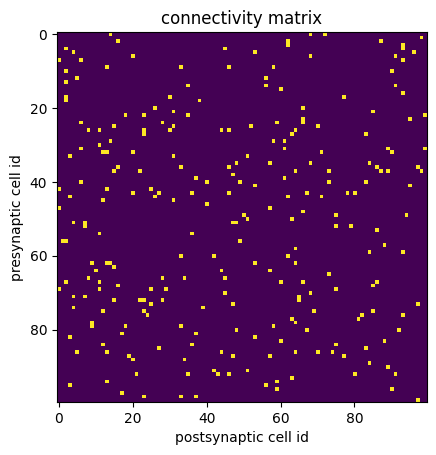

In [13]:
# we `measure` a random connectivity matrix
connectivity_matrix = np.random.randn(n_cells, n_cells) > 2
plt.imshow(connectivity_matrix)
plt.xlabel("postsynaptic cell id")
plt.ylabel("presynaptic cell id")
plt.title("connectivity matrix")

In [14]:
# we store the connectivity as graph (i.e. edges) because its sparse
post_cell_id, pre_cell_id = np.where(connectivity_matrix)
cell_measurements.connections.pre_cell_id = pre_cell_id
cell_measurements.connections.post_cell_id = post_cell_id

In [15]:
# the connections are now stored in our directory
cell_measurements

Directory_0000/ - Last modified: January 27, 2025 14:52:42
├── _meta.yaml
├── cell_id.h5
├── colors.h5
├── connections/
│   ├── _meta.yaml
│   ├── post_cell_id.h5
│   └── pre_cell_id.h5
├── x.h5
└── y.h5

displaying: 2 directories, 8 files, 2 levels.

In [16]:
# we access them later from the same directory
cell_measurements.connections

connections/ - Last modified: January 27, 2025 14:52:42
├── _meta.yaml
├── post_cell_id.h5
└── pre_cell_id.h5

displaying: 1 directory, 3 files, 2 levels.

In [17]:
# with attribute-style access to the h5-array
cell_measurements.connections.pre_cell_id[:]

array([14, 68, 72, 98, 16, 62, 87, 62, 93,  2, 45, 93,  4, 53, 96, 20, 68,
       91,  0,  6, 93, 13, 33, 46, 58,  2, 90,  5, 56,  2, 35, 56, 91, 60,
       93,  2, 30, 77,  2, 38, 26, 66, 31, 85, 18, 23, 35, 99, 66, 95,  6,
       28, 59, 66, 15, 31, 52, 70,  8, 11, 23, 30, 44, 46, 64, 23, 63, 83,
       14, 58, 61, 11,  6, 61, 89, 99, 12, 13, 20, 71, 90,  3, 31, 51, 48,
       57, 68, 84, 16, 33, 46, 86, 97, 15, 22, 64, 73, 87, 89, 98, 47, 37,
       61,  6, 40, 49, 73, 83, 53, 95,  0, 13, 25, 20, 27, 36, 46, 67, 78,
       80,  3, 26, 62, 71, 12, 31, 40,  0, 57, 66, 50, 75, 94, 51, 63,  4,
        7, 47, 48,  7, 75, 79, 86, 11, 36,  1,  2, 49, 88, 64, 84, 93, 33,
       42, 62,  9, 13, 14, 53, 64, 15, 10, 44, 57, 73,  8, 28, 34, 45,  2,
       11, 60, 66, 86, 16, 85,  0, 11, 25, 29, 75, 45, 68,  4,  7, 65, 15,
       22, 23, 28, 65, 25, 47, 97,  4, 39, 12, 23, 69, 85, 24, 82, 93, 63,
       81,  9, 64,  9, 18, 33, 58, 48, 67, 92, 17, 37,  3, 53, 60, 88, 12,
       36, 75, 27, 83,  5

In [18]:
# or composing strings following the pathlib syntax for your preference
(cell_measurements / "connections/pre_cell_id")[:]

array([14, 68, 72, 98, 16, 62, 87, 62, 93,  2, 45, 93,  4, 53, 96, 20, 68,
       91,  0,  6, 93, 13, 33, 46, 58,  2, 90,  5, 56,  2, 35, 56, 91, 60,
       93,  2, 30, 77,  2, 38, 26, 66, 31, 85, 18, 23, 35, 99, 66, 95,  6,
       28, 59, 66, 15, 31, 52, 70,  8, 11, 23, 30, 44, 46, 64, 23, 63, 83,
       14, 58, 61, 11,  6, 61, 89, 99, 12, 13, 20, 71, 90,  3, 31, 51, 48,
       57, 68, 84, 16, 33, 46, 86, 97, 15, 22, 64, 73, 87, 89, 98, 47, 37,
       61,  6, 40, 49, 73, 83, 53, 95,  0, 13, 25, 20, 27, 36, 46, 67, 78,
       80,  3, 26, 62, 71, 12, 31, 40,  0, 57, 66, 50, 75, 94, 51, 63,  4,
        7, 47, 48,  7, 75, 79, 86, 11, 36,  1,  2, 49, 88, 64, 84, 93, 33,
       42, 62,  9, 13, 14, 53, 64, 15, 10, 44, 57, 73,  8, 28, 34, 45,  2,
       11, 60, 66, 86, 16, 85,  0, 11, 25, 29, 75, 45, 68,  4,  7, 65, 15,
       22, 23, 28, 65, 25, 47, 97,  4, 39, 12, 23, 69, 85, 24, 82, 93, 63,
       81,  9, 64,  9, 18, 33, 58, 48, 67, 92, 17, 37,  3, 53, 60, 88, 12,
       36, 75, 27, 83,  5

## Configuration-based compilation of data

We wrap up the code above into a coherent object that can be configured and compiled to a `Directory`.

In [19]:
from time import sleep
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from datamate import Directory, root

data_dir = Path(".") / "data"


@root(data_dir)  # this optional decorator defines the root directory
class CellMeasurements(Directory):

    def __init__(self, n_cells=100, seed=0):
        print("Loading connectome ...")
        sleep(5)
        np.random.seed(seed)

        # store cell attributes
        self.cell_id = np.arange(n_cells)
        self.x = np.random.normal(0, 1, size=n_cells)
        self.y = np.random.normal(0, 1, size=n_cells)
        self.colors = np.random.rand(n_cells, 3)

        # store connectivity attributes
        connectivity_matrix = np.random.randn(n_cells, n_cells)
        pre_cell_id, post_cell_id = np.where(connectivity_matrix > 2)
        self.connections.pre_cell_id = pre_cell_id
        self.connections.post_cell_id = post_cell_id
        print("Stored connectome!")

In [20]:
# we init 'CellMeasurements'
# __init__ is only run if a directory of this type and config does not yet exist
cell_measurements = CellMeasurements()

Loading connectome ...


Stored connectome!


In [21]:
# we verify contents written by __init__
cell_measurements

CellMeasurements_0000/ - Last modified: January 27, 2025 14:52:47
├── _meta.yaml
├── cell_id.h5
├── colors.h5
├── connections/
│   ├── _meta.yaml
│   ├── post_cell_id.h5
│   └── pre_cell_id.h5
├── x.h5
└── y.h5

displaying: 2 directories, 8 files, 2 levels.

In [22]:
# we verify config written by __init__
cell_measurements.meta

Namespace(
  config = Namespace(type='CellMeasurements', n_cells=100, seed=0),
  status = 'done'
)

In [23]:
# we change the seed
# we automatically get a second directory of the same type (but with different data)
cell_measurements_2 = CellMeasurements(n_cells=100, seed=42)

Loading connectome ...


Stored connectome!


In [24]:
# we verify contents written by __init__
cell_measurements_2

CellMeasurements_0001/ - Last modified: January 27, 2025 14:52:52
├── _meta.yaml
├── cell_id.h5
├── colors.h5
├── connections/
│   ├── _meta.yaml
│   ├── post_cell_id.h5
│   └── pre_cell_id.h5
├── x.h5
└── y.h5

displaying: 2 directories, 8 files, 2 levels.

In [25]:
# we verify config written by __init__
cell_measurements_2.meta

Namespace(
  config = Namespace(type='CellMeasurements', n_cells=100, seed=42),
  status = 'done'
)

## Memory persistence

We restart the kernel and retrieve the data quickly later, using the same code and without recomputing.

In [26]:
from time import sleep
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from datamate import Directory, root

data_dir = Path(".") / "data"


@root(data_dir)
class CellMeasurements(Directory):

    def __init__(self, n_cells=100, seed=0):
        print("Loading connectome ...")
        sleep(5)
        np.random.seed(seed)

        # store cell attributes
        self.cell_id = np.arange(n_cells)
        self.x = np.random.normal(0, 1, size=n_cells)
        self.y = np.random.normal(0, 1, size=n_cells)
        self.colors = np.random.rand(n_cells, 3)

        # store connectivity attributes
        connectivity_matrix = np.random.randn(n_cells, n_cells)
        pre_cell_id, post_cell_id = np.where(connectivity_matrix > 2)
        self.connections.pre_cell_id = pre_cell_id
        self.connections.post_cell_id = post_cell_id
        print("Stored connectome!")

In [27]:
# fast init because points to the directories with the same type and configuration
cell_measurements = CellMeasurements(n_cells=100, seed=0)
cell_measurements_2 = CellMeasurements(n_cells=100, seed=42)

In [28]:
cell_measurements.config

Namespace(type='CellMeasurements', n_cells=100, seed=0)

In [29]:
cell_measurements_2.config

Namespace(type='CellMeasurements', n_cells=100, seed=42)

### Pandas integration

We load the h5 data to a pandas dataframe for further processing.

In [30]:
cells = cell_measurements.to_df()
connections = cell_measurements.connections.to_df()

In [31]:
cells

,cell_id,x,y,colors
0,0,1.764052,1.883151,"[0.961936378547229, 0.29214752679254885, 0.240..."
1,1,0.400157,-1.347759,"[0.10029394226549782, 0.016429629591474204, 0...."
2,2,0.978738,-1.270485,"[0.66991654659091, 0.7851529120231378, 0.28173..."
3,3,2.240893,0.969397,"[0.5864101661863267, 0.06395526612098112, 0.48..."
4,4,1.867558,-1.173123,"[0.9774951397444468, 0.8765052453165908, 0.338..."
...,...,...,...,...
95,95,0.706573,-0.171546,"[0.5887396099702882, 0.9627703198402424, 0.016..."
96,96,0.010500,0.771791,"[0.6964824307014501, 0.8136786497018634, 0.509..."
97,97,1.785870,0.823504,"[0.33396486959680916, 0.7908401632274049, 0.09..."
98,98,0.126912,2.163236,"[0.44203563772992527, 0.5199523745708382, 0.69..."


In [32]:
connections

,post_cell_id,pre_cell_id
0,23,0
1,33,0
2,62,0
3,28,1
4,54,2
...,...,...
206,8,97
207,35,97
208,9,98
209,81,98


We load the meta data into a pandas dataframe.

In [33]:
cell_measurements.meta.to_df(name="measurements 1")

,measurements 1
status,done
config.type,CellMeasurements
config.n_cells,100
config.seed,0


In [34]:
cell_measurements_2.meta.to_df(name="measurements 2")

,measurements 2
status,done
config.type,CellMeasurements
config.n_cells,100
config.seed,42


We tabularize experiment configurations.

In [35]:
configs = cell_measurements.meta.to_df(name="measurements 1").join(
    cell_measurements_2.meta.to_df(name="measurements 2")
)
configs

,measurements 1,measurements 2
status,done,done
config.type,CellMeasurements,CellMeasurements
config.n_cells,100,100
config.seed,0,42


Or, vice versa, we create a directory from a pandas DataFrame (note, must provide [h5py compatible type information](https://docs.h5py.org/en/stable/faq.html)):

In [36]:
configs

,measurements 1,measurements 2
status,done,done
config.type,CellMeasurements,CellMeasurements
config.n_cells,100,100
config.seed,0,42


In [37]:
dtypes = {"measurements 1": "S50", "measurements 2": "S50"}

In [38]:
# we create a directory from the dataframe of configs
directory = Directory.from_df(configs, dtypes, "experiments_config")

In [39]:
directory

experiments_config/ - Last modified: January 27, 2025 14:52:52
├── _meta.yaml
├── measurements 1.h5
└── measurements 2.h5

displaying: 1 directory, 3 files, 2 levels.

In [40]:
directory.to_df(dtypes={"measurements 1": str, "measurements 2": str})

,measurements 2,measurements 1
0,done,done
1,CellMeasurements,CellMeasurements
2,100,100
3,42,0


Alternatively, we seamlessly store and retrieve dataframes via csv files.

In [41]:
directory.cells = cell_measurements.to_df()
directory.connections = connections

In [42]:
# we verify the dataframes
directory.cells

,cell_id,x,y,colors
0,0,1.764052,1.883151,"[0.961936378547229, 0.29214752679254885, 0.240..."
1,1,0.400157,-1.347759,"[0.10029394226549782, 0.016429629591474204, 0...."
2,2,0.978738,-1.270485,"[0.66991654659091, 0.7851529120231378, 0.28173..."
3,3,2.240893,0.969397,"[0.5864101661863267, 0.06395526612098112, 0.48..."
4,4,1.867558,-1.173123,"[0.9774951397444468, 0.8765052453165908, 0.338..."
...,...,...,...,...
95,95,0.706573,-0.171546,"[0.5887396099702882, 0.9627703198402424, 0.016..."
96,96,0.010500,0.771791,"[0.6964824307014501, 0.8136786497018634, 0.509..."
97,97,1.785870,0.823504,"[0.33396486959680916, 0.7908401632274049, 0.09..."
98,98,0.126912,2.163236,"[0.44203563772992527, 0.5199523745708382, 0.69..."


In [43]:
directory.connections

,post_cell_id,pre_cell_id
0,23,0
1,33,0
2,62,0
3,28,1
4,54,2
...,...,...
206,8,97
207,35,97
208,9,98
209,81,98


In [44]:
# we extend the dataframes
directory.extend("cells", cell_measurements_2.to_df())
directory.extend("connections", cell_measurements_2.connections.to_df())

In [45]:
# we verify the dataframes
directory.cells

,cell_id,x,y,colors
0,0,1.764052,1.883151,"[0.961936378547229, 0.29214752679254885, 0.240..."
1,1,0.400157,-1.347759,"[0.10029394226549782, 0.016429629591474204, 0...."
2,2,0.978738,-1.270485,"[0.66991654659091, 0.7851529120231378, 0.28173..."
3,3,2.240893,0.969397,"[0.5864101661863267, 0.06395526612098112, 0.48..."
4,4,1.867558,-1.173123,"[0.9774951397444468, 0.8765052453165908, 0.338..."
...,...,...,...,...
195,95,-1.463515,0.385317,"[0.7723183917356393, 0.5201635011119934, 0.852..."
196,96,0.296120,-0.883857,"[0.5519068387744855, 0.5609379715353863, 0.876..."
197,97,0.261055,0.153725,"[0.40348286621239704, 0.13401522845064073, 0.0..."
198,98,0.005113,0.058209,"[0.755137255673619, 0.6203095513534647, 0.7040..."


In [46]:
# we verify the dataframes
directory.connections

,post_cell_id,pre_cell_id
0,23,0
1,33,0
2,62,0
3,28,1
4,54,2
...,...,...
437,57,97
438,61,97
439,91,98
440,27,99


### Example: visualize the graph

In [47]:
def visualize_measurements(cell_measurements):
    try:
        import networkx as nx
    except ModuleNotFoundError as e:
        print(e, ", install networkx to visualize the cell graph structure.")
        _input = input("install now? yes/no")
        if _input == "yes":
            import sys
            !{sys.executable} -m pip install networkx
            import networkx as nx
        else:
            return
        
    cells = cell_measurements.to_df()
    connections = cell_measurements.connections.to_df()
        
    G = nx.Graph()
    G.add_nodes_from(cells.cell_id)
    G.add_edges_from(connections.values)
    pos = dict(zip(cells["cell_id"].values, cells[["x", "y"]].values))

    options = {
        "font_size": 4,
        "node_size": 10,
        "node_color": cell_measurements.colors[:],
        "edgecolors": "0.5",
        "linewidths": 0.25,
        "width": 0.25,
    }
    nx.draw_networkx(G, pos, **options)

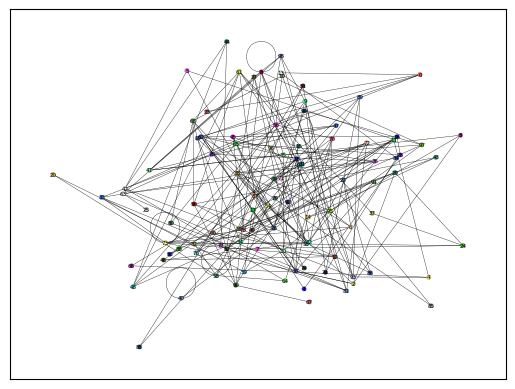

In [48]:
visualize_measurements(cell_measurements)

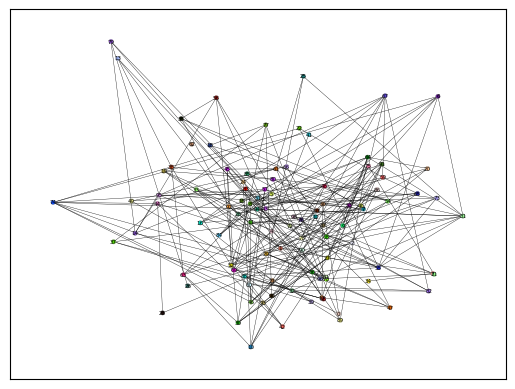

In [49]:
visualize_measurements(cell_measurements_2)

## Configuration comparison and diffing

In [50]:
# we compare how the `measurements` differ in their configuration
# (this works with complex nested configurations too)
cell_measurements.meta.diff(cell_measurements_2.meta)

Namespace(self=['≠config.seed: 0'], other=['≠config.seed: 42'])

## Directory structure visualization (tree view)

In [51]:
from datamate import Directory, set_verbosity_level

data_dir = Path(".") / "data"

In [52]:
# default: we display 2 levels of the hierarchy and 25 lines
set_verbosity_level(1)
Directory(data_dir)

data/ - Last modified: January 27, 2025 14:52:52
├── CellMeasurements_0000/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ...
│   ├── x.h5
│   └── y.h5
├── CellMeasurements_0001/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ...
│   ├── x.h5
│   └── y.h5
├── Directory_0000/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ...
│   ├── x.h5
│   └── y.h5
└── experiments_config/
... length_limit, 25, reached,
displaying: 8 directories, 15 files, 2 levels.

In [53]:
# we display all subdirectories and files
set_verbosity_level(2)
Directory(data_dir)

data/ - Last modified: January 27, 2025 14:52:52
├── CellMeasurements_0000/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ├── _meta.yaml
│   │   ├── post_cell_id.h5
│   │   └── pre_cell_id.h5
│   ├── x.h5
│   └── y.h5
├── CellMeasurements_0001/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ├── _meta.yaml
│   │   ├── post_cell_id.h5
│   │   └── pre_cell_id.h5
│   ├── x.h5
│   └── y.h5
├── Directory_0000/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ├── _meta.yaml
│   │   ├── post_cell_id.h5
│   │   └── pre_cell_id.h5
│   ├── x.h5
│   └── y.h5
└── experiments_config/
    ├── _meta.yaml
    ├── cells.csv
    ├── connections.csv
    ├── measurements 1.h5
    └── measurements 2.h5

displaying: 8 directories, 29 files

In [54]:
# we display referenced folder and last modified date
set_verbosity_level(0)
Directory(data_dir)

data/ - Last modified: January 27, 2025 14:52:52

In [55]:
set_verbosity_level(2)

## Parallel read/write operations

We start the training loop by running the cells below.

We run the jupyter notebook `01b_datamate_intro_supplement.ipynb` to see how data is simultaneously written and read to the loss.h5 file.

In [56]:
from tqdm.auto import tqdm
from time import sleep
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from datamate import Directory, root

data_dir = Path(".") / "data"


@root(data_dir)
class NetworkDir(Directory):

    class Config:
        tau: float = 200.0
        sigma: float = 0.1

    def __init__(self, num_iters: int = 100):
        del self.loss
        for i in tqdm(range(num_iters), desc="Training"):
            self.train_iter(i)

    def train_iter(self, iter):
        self.extend(
            "loss",
            [np.exp(-iter / self.config.tau) + np.random.rand() * self.config.sigma],
        )
        sleep(0.25)

In [57]:
network_dir = NetworkDir()
network_dir

Training:   0%|          | 0/100 [00:00<?, ?it/s]

NetworkDir_0000/ - Last modified: January 27, 2025 14:52:53
├── _meta.yaml
└── loss.h5

displaying: 1 directory, 2 files

Text(0.5, 1.0, 'Training loss')

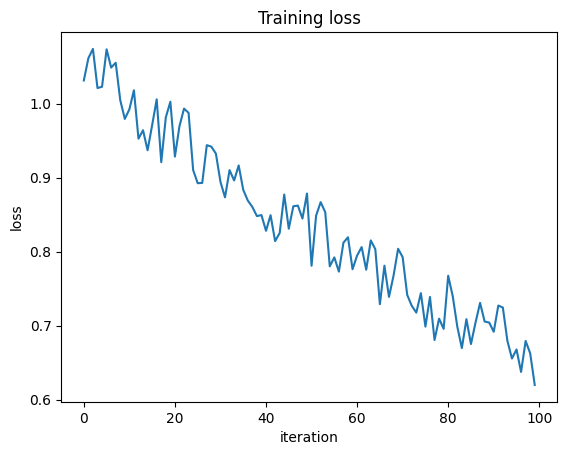

In [58]:
plt.plot(network_dir.loss[:])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Training loss")

In [59]:
# we verify that the directory exists
"NetworkDir_0000" in Directory(data_dir)

True

In [60]:
# we delete the directory and its contents
# network_dir.rmtree("y")

In [61]:
# we verify that the directory is deleted
# "NetworkDir_0000" in Directory(data_dir)